In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import matplotlib.patches as mpatches



In [1]:
def create_linear_dataset(n):
    pos_class=n-random.randrange(1,n)
    neg_class=n-pos_class
    min_val = -20    
    max_val = 20
    m=round(random.uniform(-1,1),1)
    b=round(random.uniform(-2,2),1)
    # x1,y1 values for the +ve class
    x1 = [random.randrange(min_val, max_val) for i in range(pos_class)]
    y1 = [random.randrange(math.floor(m*x+b)+min_val, math.floor(m*x+b)) for x in x1]
    # x2,y2 values for the -ve clss 
    x2=[random.randrange(min_val,max_val) for i in range(neg_class)]
    y2=[random.randrange(math.ceil(m*x+b),max_val+math.floor(m*x+b)) for x in x2]
    data =[]
    for i in range(0,pos_class):
        data.append([1,x1[i],y1[i],1])
    for j in range(0,neg_class):
        data.append([1,x2[j],y2[j],-1])
    random.shuffle(data)
    
    return min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data

In [5]:
def perceptron_weights(w,x):
    return w[0]*x[0]+w[1]*x[1]+(w[2]*x[2])

In [6]:
def update_weight(w,x):
    w[0]=w[0]+x[0]*x[3]
    w[1]=w[1]+x[1]*x[3]
    w[2]=w[2]+x[2]*x[3]
    w=[w[0],w[1],w[2]]
    return w

In [7]:
def plot_f_x(min_val,max_val,m,b):
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)+b)

In [8]:
def plot_g_x(weights,min_val,max_val):
    m=-(weights[1]/weights[2])
    b=-(weights[0]/weights[2])
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)+b,c="red")

In [2]:
def sign(x):
    if x>=0:
        return 1
    else:
        return -1

In [3]:
def plot_data(x1,x2,y1,y2):
    plt.scatter(x1,y1,c="red")
    plt.scatter(x2,y2,c="green")
    plt.xlabel("x1")
    plt.ylabel("x2")

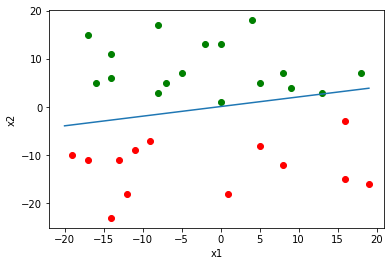

In [22]:
n=30
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

In [66]:
def perceptron_learning_algorithm(x1, x2, y1, y2, min_val,max_val, m, b,data,n):
    #initial weights set to 0
    w_t=[0.0,0.0,0.0]
    iterations=0
    convergence=0
    while not convergence:
        iterations=iterations+1
        curr_ncorrect=0
        for d in data:
            if(sign(perceptron_weights(w_t,d))!=d[3]):
                w_t=update_weight(w_t,d)
            else:
                curr_ncorrect=curr_ncorrect+1
        error=1-(curr_ncorrect/n)
        print("After {} iterations the error rate is {}".format(iterations,error))
        if(curr_ncorrect==n):
            convergence=1
    plot_data(x1,x2,y1,y2)
    plot_f_x(min_val,max_val,m,b)
    plot_g_x(w_t,min_val,max_val)
    print("no of iterations taken for convergence = ",iterations)
    fx = mpatches.Patch(color='blue', label='f(x)')
    gx = mpatches.Patch(color='red', label='g(x)')
    plt.legend(handles=[fx, gx])
    plt.show()
    

Generate a linearly separable 2D data set of size 30. Plot the examples (points blue/red based on their
classification) and the target function f. Be sure to add labels to the axes of the plot.

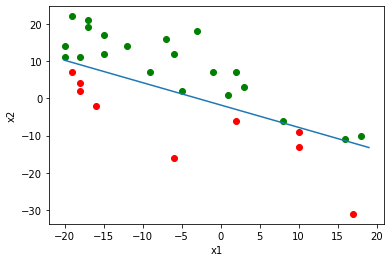

In [123]:
n=30
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

B. Run the PLA on the dataset in (A). Report the number of updates before the algorithm converges. Plot
the final hypothesis g and f in the same figure. Describe what you see and if the result g is close to f.

After 1 iterations the error rate is 0.30000000000000004
After 2 iterations the error rate is 0.2666666666666667
After 3 iterations the error rate is 0.23333333333333328
After 4 iterations the error rate is 0.23333333333333328
After 5 iterations the error rate is 0.23333333333333328
After 6 iterations the error rate is 0.1333333333333333
After 7 iterations the error rate is 0.19999999999999996
After 8 iterations the error rate is 0.1333333333333333
After 9 iterations the error rate is 0.19999999999999996
After 10 iterations the error rate is 0.1333333333333333
After 11 iterations the error rate is 0.19999999999999996
After 12 iterations the error rate is 0.1333333333333333
After 13 iterations the error rate is 0.19999999999999996
After 14 iterations the error rate is 0.06666666666666665
After 15 iterations the error rate is 0.16666666666666663
After 16 iterations the error rate is 0.1333333333333333
After 17 iterations the error rate is 0.19999999999999996
After 18 iterations the error

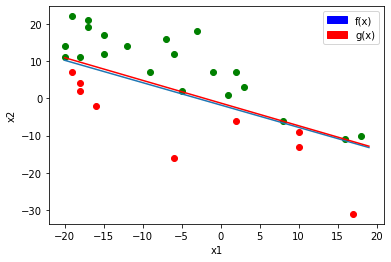

In [124]:
perceptron_learning_algorithm(x1, x2, y1, y2, min_val,max_val, m, b,data,n)

Repeat A-B with another randomly generated data set of size 30. Compare your results with B.

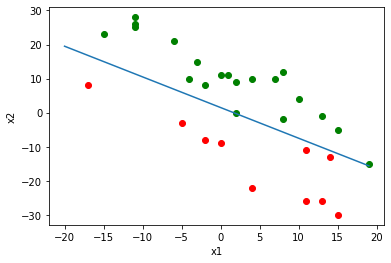

In [83]:
n=30
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

After 1 iterations the error rate is 0.16666666666666663
After 2 iterations the error rate is 0.06666666666666665
After 3 iterations the error rate is 0.06666666666666665
After 4 iterations the error rate is 0.06666666666666665
After 5 iterations the error rate is 0.06666666666666665
After 6 iterations the error rate is 0.06666666666666665
After 7 iterations the error rate is 0.06666666666666665
After 8 iterations the error rate is 0.06666666666666665
After 9 iterations the error rate is 0.06666666666666665
After 10 iterations the error rate is 0.0
no of iterations taken for convergence =  10


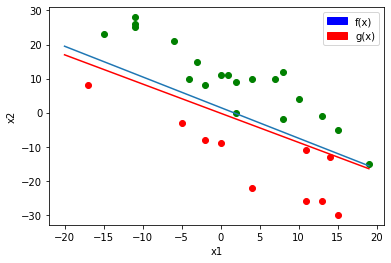

In [84]:
perceptron_learning_algorithm(x1, x2, y1, y2, min_val,max_val, m, b,data,n)

Repeat A-B with another randomly generated data set of size 1000. Compare your results with B.

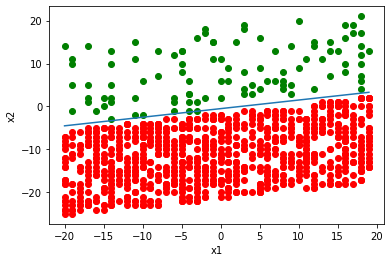

In [95]:
n=1000
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

After 1 iterations the error rate is 0.019000000000000017
After 2 iterations the error rate is 0.010000000000000009
After 3 iterations the error rate is 0.0040000000000000036
After 4 iterations the error rate is 0.0030000000000000027
After 5 iterations the error rate is 0.006000000000000005
After 6 iterations the error rate is 0.0040000000000000036
After 7 iterations the error rate is 0.0030000000000000027
After 8 iterations the error rate is 0.0040000000000000036
After 9 iterations the error rate is 0.007000000000000006
After 10 iterations the error rate is 0.0040000000000000036
After 11 iterations the error rate is 0.0010000000000000009
After 12 iterations the error rate is 0.0030000000000000027
After 13 iterations the error rate is 0.0040000000000000036
After 14 iterations the error rate is 0.006000000000000005
After 15 iterations the error rate is 0.0030000000000000027
After 16 iterations the error rate is 0.0010000000000000009
After 17 iterations the error rate is 0.00100000000000

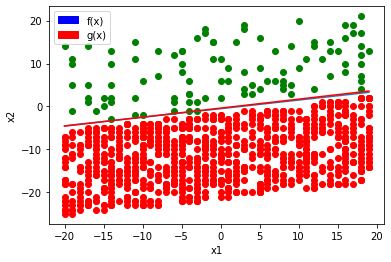

In [103]:
perceptron_learning_algorithm(x1, x2, y1, y2, min_val,max_val, m, b,data,n)